In [1]:
import numpy as np
import pandas as pd
from scipy import spatial, stats, cluster
import matplotlib.pyplot as plt
import seaborn as sns
import nibabel as nib
from nilearn import plotting, input_data
from nilearn.datasets import fetch_atlas_schaefer_2018
import networkx as nx
import matplotlib.cm as mplcm
import matplotlib.colors as colors
import bct
import glob
import community as community_louvain
import matplotlib.cm as cm
from sklearn.metrics import adjusted_rand_score
import os
import random


%matplotlib inline

# Styles
sns.set_context('poster')
sns.set_style('darkgrid')

plt.rcParams['figure.figsize'] = [12, 6]
plt.rcParams['figure.dpi'] = 100 # 200 e.g. is really fine, but slower


In [2]:
filename = '../resources/DataSujetos/N1_suj1.csv'
df = pd.read_csv(filename, header=None)
n = df.shape[0]
aristas_posibles = (n*n-1)//2
df -= np.diag(np.ones(n))
filename = '../resources/DataSujetos/W_suj1.csv'
df_w = pd.read_csv(filename, header=None)
df_w -= np.diag(np.ones(n))

In [3]:
# Set con la cantidad de sujetos
l1 = {0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17}

In [4]:
def subjectmatrix2graphslist(filename, densities):
    """
    Toma un archivo csv con la matriz de input y devuelve una lista de grafos con la densisdad de aristas correspondiente
    """
    
    correlation_matrix = pd.read_csv(filename, header=None)
    n = correlation_matrix.shape[0]
    correlation_matrix -= np.diag(np.ones(n))
    max_links = (n*n-n)//2
    tril_idx = np.tril_indices(n,-1)
    sorted_correlations = sorted(correlation_matrix.values[tril_idx].flatten(),reverse=True)
    
    Gs = []
    for d in densities:
        idx = int(d*max_links)
        threshold = sorted_correlations[idx]
        Gs.append(nx.from_pandas_adjacency(correlation_matrix>=threshold))
        
    return Gs

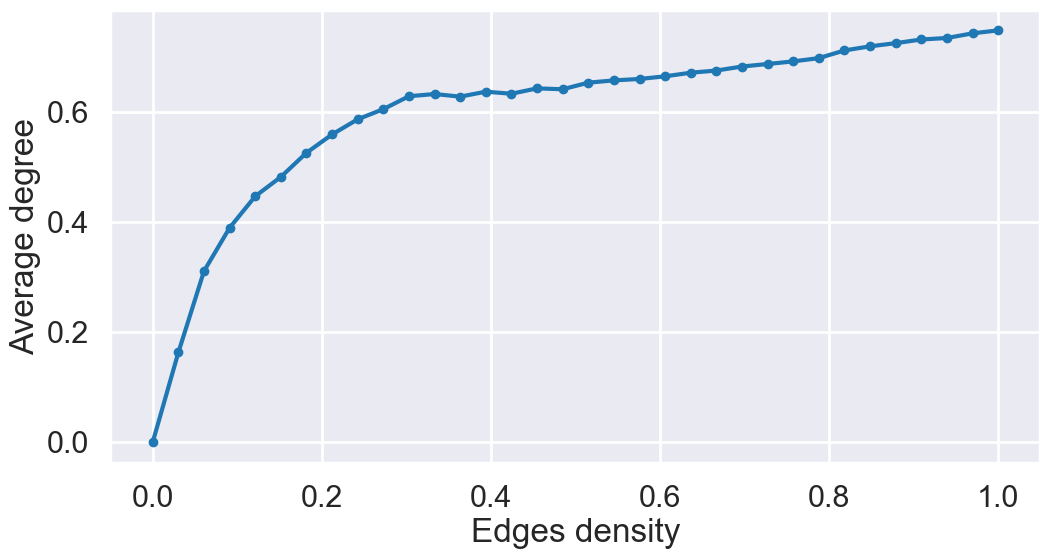

In [5]:
sort_corrs = sorted(df.values.flatten(),reverse=True)
avg_clustering = []
ds = np.arange(0,(n*n-n)//2,200)
for d in ds:
    u = sort_corrs[d]
    G = nx.from_pandas_adjacency(df>=u)
    avg_clustering_ = nx.average_clustering(G)
    avg_clustering.append(avg_clustering_)
    
plt.plot(ds/ds.max(),avg_clustering,'.-')
plt.xlabel('Edges density')
plt.ylabel('Average degree');

In [6]:
sort_corrs[300]

0.78922

In [7]:
aristas_posibles= (n*n-n)//2
aristas_posibles*0.15 #Busco cantidad tal que densidad sea 0.15

1000.5

### Sujeto 1: N1 vs W

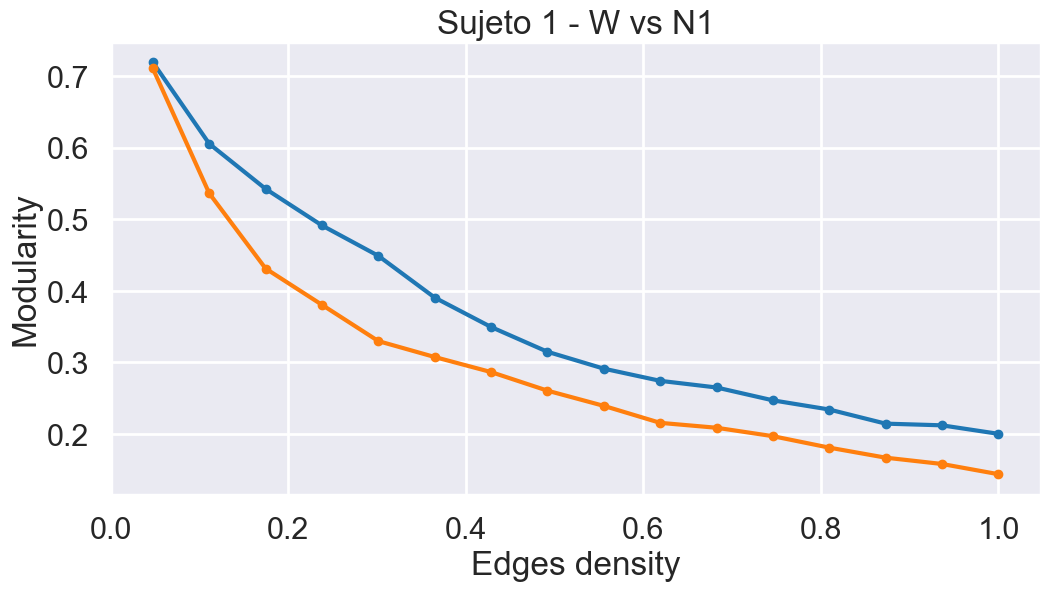

In [8]:
sort_corrs = sorted(df.values.flatten(),reverse=True)
sort_corrs_w = sorted(df_w.values.flatten(),reverse=True)
modularity = []
modularity_w = []

ds = np.arange(300,(n*n-n)//2,400)
for d in ds:
    u = sort_corrs[d]
    G = nx.from_pandas_adjacency(df>=u)
    modulos = community_louvain.best_partition(G)
    modularity_ = community_louvain.modularity(modulos,G)
    modularity.append(modularity_)
    
    u_w = sort_corrs_w[d]
    G_w = nx.from_pandas_adjacency(df_w>=u_w)
    modulos = community_louvain.best_partition(G_w)
    modularity_ = community_louvain.modularity(modulos,G_w)
    modularity_w.append(modularity_)
    
plt.plot(ds/ds.max(),modularity,'.-')
plt.plot(ds/ds.max(),modularity_w,'.-')
plt.title('Sujeto 1 - W vs N1')
plt.xlabel('Edges density')
plt.ylabel('Modularity');

### Sujeto 1: N1 vs W, cambio de escala

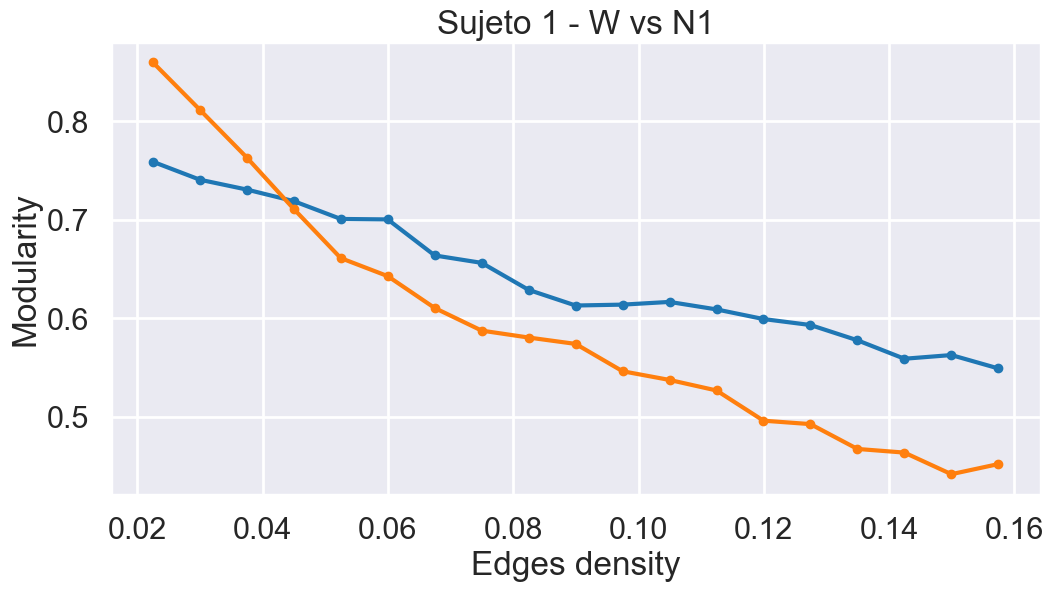

In [9]:
sort_corrs = sorted(df.values.flatten(),reverse=True)
sort_corrs_w = sorted(df_w.values.flatten(),reverse=True)
modularity = []
modularity_w = []

ds = np.arange(150,2200//2,50)
for d in ds:
    u = sort_corrs[d]
    G = nx.from_pandas_adjacency(df>=u)
    modulos = community_louvain.best_partition(G)
    modularity_ = community_louvain.modularity(modulos,G)
    modularity.append(modularity_)
    
    u_w = sort_corrs_w[d]
    G_w = nx.from_pandas_adjacency(df_w>=u_w)
    modulos = community_louvain.best_partition(G_w)
    modularity_ = community_louvain.modularity(modulos,G_w)
    modularity_w.append(modularity_)
    
plt.plot(ds/aristas_posibles,modularity,'.-')
plt.plot(ds/aristas_posibles,modularity_w,'.-')
plt.title('Sujeto 1 - W vs N1')
plt.xlabel('Edges density')
plt.ylabel('Modularity');

### Sujeto 2: N1 vs W

In [10]:
filename = '../resources/DataSujetos/N1_suj2.csv'
df = pd.read_csv(filename, header=None)
n = df.shape[0]
df -= np.diag(np.ones(n))
filename = '../resources/DataSujetos/W_suj2.csv'
df_w = pd.read_csv(filename, header=None)
df_w -= np.diag(np.ones(n))

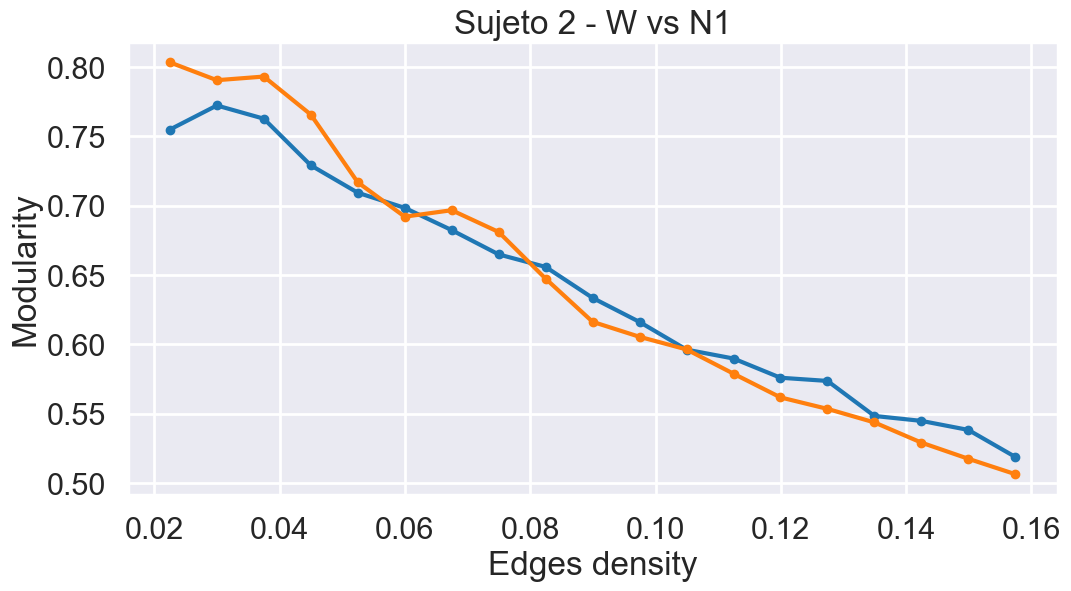

In [11]:
sort_corrs = sorted(df.values.flatten(),reverse=True)
sort_corrs_w = sorted(df_w.values.flatten(),reverse=True)
modularity = []
modularity_w = []

ds = np.arange(150,2200//2,50)
for d in ds:
    u = sort_corrs[d]
    G = nx.from_pandas_adjacency(df>=u)
    modulos = community_louvain.best_partition(G)
    modularity_ = community_louvain.modularity(modulos,G)
    modularity.append(modularity_)
    
    u_w = sort_corrs_w[d]
    G_w = nx.from_pandas_adjacency(df_w>=u_w)
    modulos = community_louvain.best_partition(G_w)
    modularity_ = community_louvain.modularity(modulos,G_w)
    modularity_w.append(modularity_)
    
plt.plot(ds/aristas_posibles,modularity,'.-')
plt.plot(ds/aristas_posibles,modularity_w,'.-')
plt.title('Sujeto 2 - W vs N1')
plt.xlabel('Edges density')
plt.ylabel('Modularity');

### Sujeto 2: N3 vs W

In [12]:
filename = '../resources/DataSujetos/N3_suj2.csv'
df = pd.read_csv(filename, header=None)
n = df.shape[0]
df -= np.diag(np.ones(n))
filename = '../resources/DataSujetos/W_suj2.csv'
df_w = pd.read_csv(filename, header=None)
df_w -= np.diag(np.ones(n))

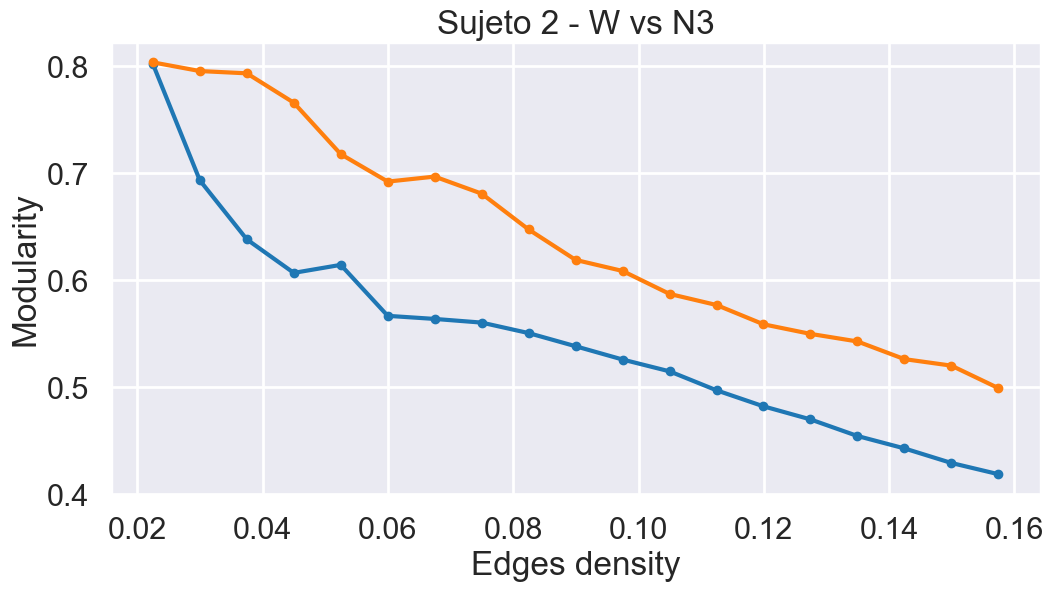

In [13]:
sort_corrs = sorted(df.values.flatten(),reverse=True)
sort_corrs_w = sorted(df_w.values.flatten(),reverse=True)
modularity = []
modularity_w = []

ds = np.arange(150,2200//2,50)
for d in ds:
    u = sort_corrs[d]
    G = nx.from_pandas_adjacency(df>=u)
    modulos = community_louvain.best_partition(G)
    modularity_ = community_louvain.modularity(modulos,G)
    modularity.append(modularity_)
    
    u_w = sort_corrs_w[d]
    G_w = nx.from_pandas_adjacency(df_w>=u_w)
    modulos = community_louvain.best_partition(G_w)
    modularity_ = community_louvain.modularity(modulos,G_w)
    modularity_w.append(modularity_)
    
plt.plot(ds/aristas_posibles,modularity,'.-')
plt.plot(ds/aristas_posibles,modularity_w,'.-')
plt.title('Sujeto 2 - W vs N3')
plt.xlabel('Edges density')
plt.ylabel('Modularity');

Text(0, 0.5, 'Number of modules')

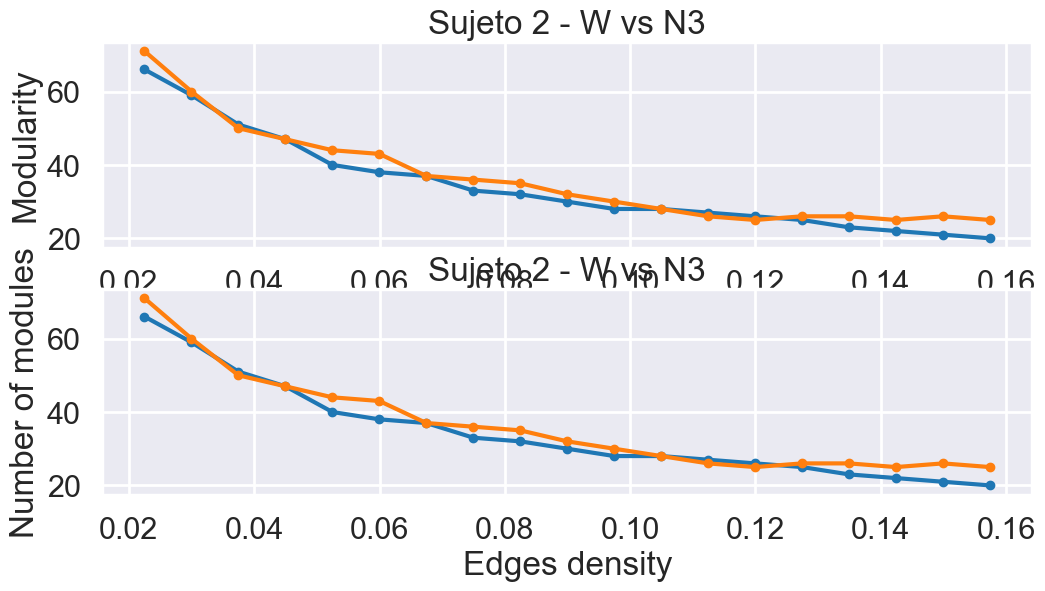

In [14]:
sort_corrs = sorted(df.values.flatten(),reverse=True)
sort_corrs_w = sorted(df_w.values.flatten(),reverse=True)
modularity = []
modularity_w = []
number_of_modules = []
number_of_modules_w = []

ds = np.arange(150,2200//2,50)
for d in ds:
    u = sort_corrs[d]
    G = nx.from_pandas_adjacency(df>=u)
    modulos = community_louvain.best_partition(G)
    modularity_ = community_louvain.modularity(modulos,G)
    modularity.append(modularity_)
    number_of_modules_ = len(set(list(modulos.values())))
    number_of_modules.append(number_of_modules_)
    
    u_w = sort_corrs_w[d]
    G_w = nx.from_pandas_adjacency(df_w>=u_w)
    modulos = community_louvain.best_partition(G_w)
    modularity_ = community_louvain.modularity(modulos,G_w)
    modularity_w.append(modularity_)
    number_of_modules_ = len(set(list(modulos.values())))
    number_of_modules_w.append(number_of_modules_)
    
plt.subplot(211)   
plt.plot(ds/aristas_posibles,number_of_modules,'.-')
plt.plot(ds/aristas_posibles,number_of_modules_w,'.-')
plt.title('Sujeto 2 - W vs N3')
plt.xlabel('Edges density')
plt.ylabel('Modularity')

plt.subplot(212)
plt.plot(ds/aristas_posibles,number_of_modules,'.-')
plt.plot(ds/aristas_posibles,number_of_modules_w,'.-')
plt.title('Sujeto 2 - W vs N3')
plt.xlabel('Edges density')
plt.ylabel('Number of modules')


Text(0, 0.5, 'Number of modules')

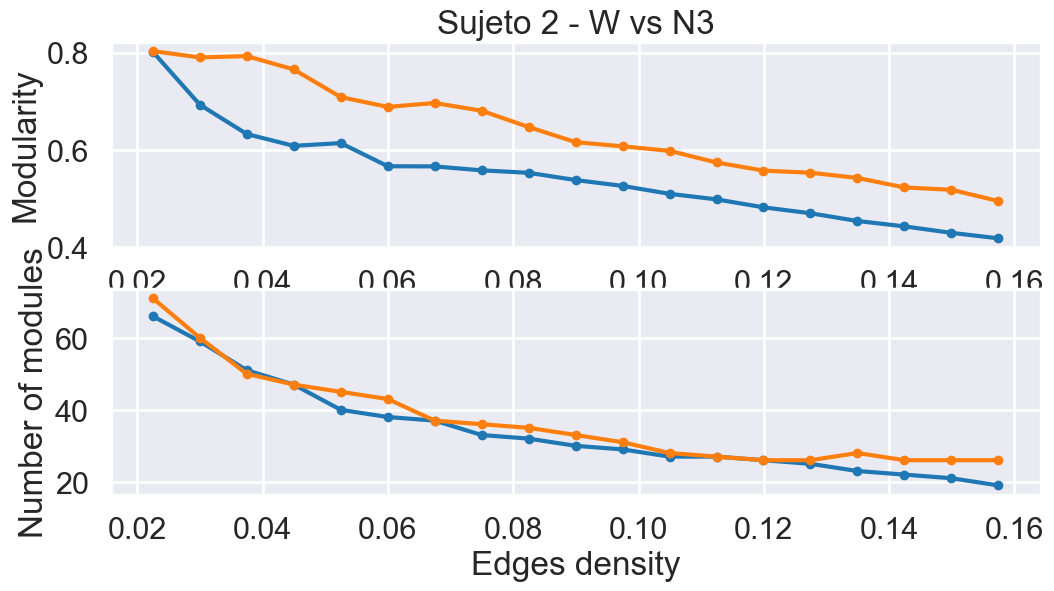

In [15]:
sort_corrs = sorted(df.values.flatten(),reverse=True)
sort_corrs_w = sorted(df_w.values.flatten(),reverse=True)
modularity = []
modularity_w = []
number_of_modules = []
number_of_modules_w = []

ds = np.arange(150,2200//2,50)
for d in ds:
    u = sort_corrs[d]
    G = nx.from_pandas_adjacency(df>=u)
    modulos = community_louvain.best_partition(G)
    modularity_ = community_louvain.modularity(modulos,G)
    modularity.append(modularity_)
    number_of_modules_ = len(set(list(modulos.values())))
    number_of_modules.append(number_of_modules_)
    
    u_w = sort_corrs_w[d]
    G_w = nx.from_pandas_adjacency(df_w>=u_w)
    modulos = community_louvain.best_partition(G_w)
    modularity_ = community_louvain.modularity(modulos,G_w)
    modularity_w.append(modularity_)
    number_of_modules_ = len(set(list(modulos.values())))
    number_of_modules_w.append(number_of_modules_)
    
plt.subplot(211)   
plt.plot(ds/aristas_posibles,modularity,'.-')
plt.plot(ds/aristas_posibles,modularity_w,'.-')
plt.title('Sujeto 2 - W vs N3')
plt.ylabel('Modularity')

plt.subplot(212)
plt.plot(ds/aristas_posibles,number_of_modules,'.-')
plt.plot(ds/aristas_posibles,number_of_modules_w,'.-')
plt.xlabel('Edges density')
plt.ylabel('Number of modules')


### Cálculo de coeficiente de modularidad y Número de módulos para cada sujeto, en función a distintas densidades

### Se definen las densidades de links a emplear

In [16]:
ds = np.arange(150,2200//2,50)

### Estadío W

In [17]:
for i in range(18):
    filename = '../resources/DataSujetos/W_suj' + str(i+1) + '.csv'
    df = pd.read_csv(filename, header=None)
    df -= np.diag(np.ones(n))
    ds = np.arange(150,2200//2,50)
    
    sort_corrs = sorted(df.values.flatten(),reverse=True)
    modularity = []
    number_of_modules = []
    
    for d in ds:
        u = sort_corrs[d]
        G = nx.from_pandas_adjacency(df>=u)
        modulos = community_louvain.best_partition(G)
        modularity_ = community_louvain.modularity(modulos,G)
        modularity.append(modularity_)
        number_of_modules_ = len(set(list(modulos.values())))
        number_of_modules.append(number_of_modules_)
    
    if i == 0:
        df_modularity_W = pd.DataFrame(modularity)
        df_number_of_modules_W = pd.DataFrame(number_of_modules)
    
    df_modularity_W.loc[:,i] = modularity
    df_number_of_modules_W.loc[:,i] = number_of_modules
    
    df_modularity_W['mean']=df_modularity_W.mean(axis=1)
    df_number_of_modules_W['mean']=df_number_of_modules_W.mean(axis=1)


### Estadío N1

In [18]:
for i in range(18):
    filename = '../resources/DataSujetos/N1_suj' + str(i+1) + '.csv'
    df = pd.read_csv(filename, header=None)
    df -= np.diag(np.ones(n))

    
    sort_corrs = sorted(df.values.flatten(),reverse=True)
    modularity = []
    number_of_modules = []
    
    for d in ds:
        u = sort_corrs[d]
        G = nx.from_pandas_adjacency(df>=u)
        modulos = community_louvain.best_partition(G)
        modularity_ = community_louvain.modularity(modulos,G)
        modularity.append(modularity_)
        number_of_modules_ = len(set(list(modulos.values())))
        number_of_modules.append(number_of_modules_)
    
    if i == 0:
        df_modularity_N1 = pd.DataFrame(modularity)
        df_number_of_modules_N1 = pd.DataFrame(number_of_modules)
    
    df_modularity_N1.loc[:,i] = modularity
    df_number_of_modules_N1.loc[:,i] = number_of_modules
    
    df_modularity_N1['mean']=df_modularity_N1.mean(axis=1)
    df_number_of_modules_N1['mean']=df_number_of_modules_N1.mean(axis=1)

  

#### Cálculo estadístico (obtengo p-values para cada estadío, modularidad y número de módulos)

In [20]:
ttest_modularity_W_N1 = pd.DataFrame(stats.ttest_ind(df_modularity_W.loc[:,l1], df_modularity_N1.loc[:,l1], axis=1)[1])
ttest_modularity_W_N1.loc[:,1]=(ds/aristas_posibles)
df_ttest_modularity_W_N1 = ttest_modularity_W_N1.loc[ttest_modularity_W_N1[0]<=0.05,:]
df_ttest_modularity_W_N1

,0,1


In [21]:
ttest_number_of_modules_W_N1 = pd.DataFrame(stats.ttest_ind(df_number_of_modules_W.loc[:,l1], df_number_of_modules_N1.loc[:,l1], axis=1)[1])
ttest_number_of_modules_W_N1.loc[:,1]=(ds/aristas_posibles)
df_ttest_number_of_modules_W_N1 = ttest_number_of_modules_W_N1.loc[ttest_number_of_modules_W_N1[0]<=0.05,:]
df_ttest_number_of_modules_W_N1

,0,1


Text(0, 0.5, 'Number of modules')

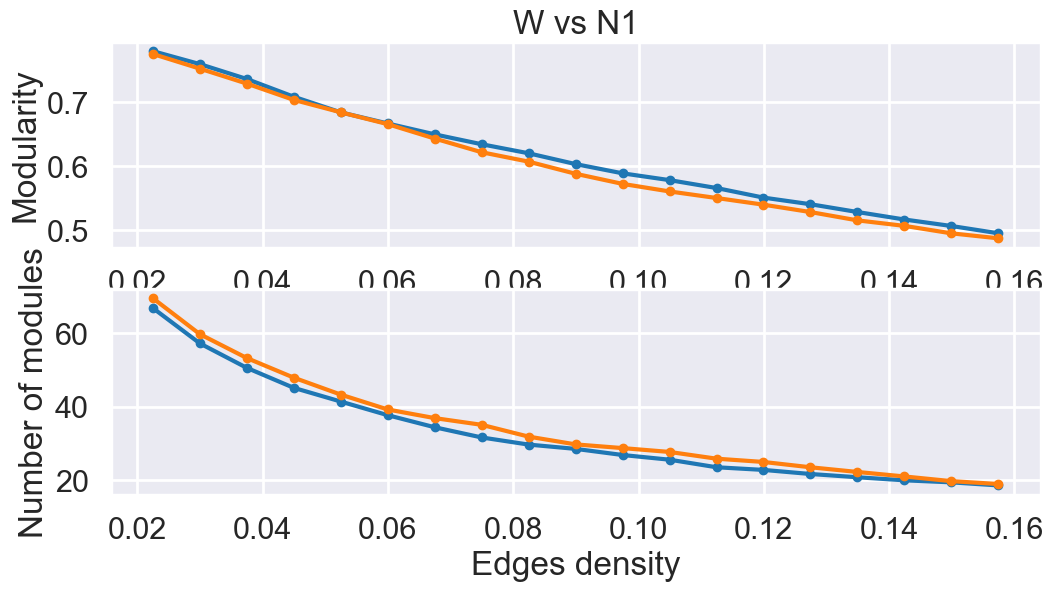

In [22]:
plt.subplot(211)   
plt.plot(ds/aristas_posibles,list(df_modularity_W['mean']),'.-')
plt.plot(ds/aristas_posibles,list(df_modularity_N1['mean']),'.-')
plt.plot(df_ttest_modularity_W_N1[1],df_ttest_modularity_W_N1[0]*0, linestyle='',marker=(6, 2, 0))
plt.title('W vs N1')
plt.ylabel('Modularity')

plt.subplot(212)
plt.plot(ds/aristas_posibles,list(df_number_of_modules_W['mean']),'.-')
plt.plot(ds/aristas_posibles,list(df_number_of_modules_N1['mean']),'.-')
plt.plot(df_ttest_number_of_modules_W_N1[1],df_ttest_number_of_modules_W_N1[0]*0, linestyle='',marker=(6, 2, 0))
plt.xlabel('Edges density')
plt.ylabel('Number of modules')


### Estadío N2

In [23]:
for i in range(18):
    filename = '../resources/DataSujetos/N2_suj' + str(i+1) + '.csv'
    df = pd.read_csv(filename, header=None)
    df -= np.diag(np.ones(n))

    
    sort_corrs = sorted(df.values.flatten(),reverse=True)
    modularity = []
    number_of_modules = []
    
    for d in ds:
        u = sort_corrs[d]
        G = nx.from_pandas_adjacency(df>=u)
        modulos = community_louvain.best_partition(G)
        modularity_ = community_louvain.modularity(modulos,G)
        modularity.append(modularity_)
        number_of_modules_ = len(set(list(modulos.values())))
        number_of_modules.append(number_of_modules_)
    
    if i == 0:
        df_modularity_N2 = pd.DataFrame(modularity)
        df_number_of_modules_N2 = pd.DataFrame(number_of_modules)
    
    df_modularity_N2.loc[:,i] = modularity
    df_number_of_modules_N2.loc[:,i] = number_of_modules
    
    df_modularity_N2['mean']=df_modularity_N2.mean(axis=1)
    df_number_of_modules_N2['mean']=df_number_of_modules_N2.mean(axis=1)

  

#### Cálculo estadístico (obtengo p-values para cada estadío, modularidad y número de módulos)

In [24]:
ttest_modularity_W_N2 = pd.DataFrame(stats.ttest_ind(df_modularity_W.loc[:,l1], df_modularity_N2.loc[:,l1], axis=1)[1])
ttest_modularity_W_N2.loc[:,1]=(ds/aristas_posibles)
df_ttest_modularity_W_N2 = ttest_modularity_W_N2.loc[ttest_modularity_W_N2[0]<=0.05,:]
df_ttest_modularity_W_N2

,0,1
0,0.011842,0.022489
1,0.006570,0.029985
2,0.008842,0.037481
3,0.010234,0.044978
4,0.018147,0.052474
5,0.017693,0.059970
6,0.023601,0.067466
7,0.045299,0.074963


In [25]:
ttest_number_of_modules_W_N2 = pd.DataFrame(stats.ttest_ind(df_number_of_modules_W.loc[:,l1], df_number_of_modules_N2.loc[:,l1], axis=1)[1])
ttest_number_of_modules_W_N2.loc[:,1]=(ds/aristas_posibles)
df_ttest_number_of_modules_W_N2 = ttest_number_of_modules_W_N2.loc[ttest_number_of_modules_W_N2[0]<=0.05,:]
df_ttest_number_of_modules_W_N2

,0,1
8,0.049434,0.082459
9,0.041353,0.089955
10,0.048625,0.097451


Text(0, 0.5, 'Number of modules')

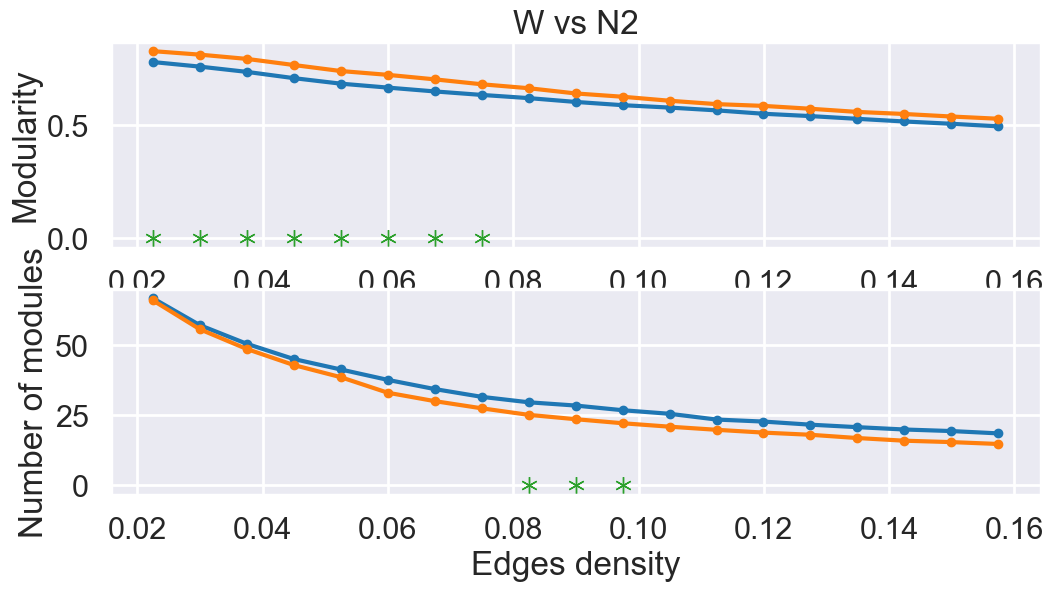

In [26]:
plt.subplot(211)   
plt.plot(ds/aristas_posibles,list(df_modularity_W['mean']),'.-')
plt.plot(ds/aristas_posibles,list(df_modularity_N2['mean']),'.-')
plt.plot(df_ttest_modularity_W_N2[1],df_ttest_modularity_W_N2[0]*0, linestyle='',marker=(6, 2, 0))
plt.title('W vs N2')
plt.ylabel('Modularity')

plt.subplot(212)
plt.plot(ds/aristas_posibles,list(df_number_of_modules_W['mean']),'.-')
plt.plot(ds/aristas_posibles,list(df_number_of_modules_N2['mean']),'.-')
plt.plot(df_ttest_number_of_modules_W_N2[1],df_ttest_number_of_modules_W_N2[0]*0, linestyle='',marker=(6, 2, 0))
plt.xlabel('Edges density')
plt.ylabel('Number of modules')


### Estadío N3

In [28]:
for i in range(18):
    filename = '../resources/DataSujetos/N3_suj' + str(i+1) + '.csv'
    df = pd.read_csv(filename, header=None)
    df -= np.diag(np.ones(n))

    
    sort_corrs = sorted(df.values.flatten(),reverse=True)
    modularity = []
    number_of_modules = []
    
    for d in ds:
        u = sort_corrs[d]
        G = nx.from_pandas_adjacency(df>=u)
        modulos = community_louvain.best_partition(G)
        modularity_ = community_louvain.modularity(modulos,G)
        modularity.append(modularity_)
        number_of_modules_ = len(set(list(modulos.values())))
        number_of_modules.append(number_of_modules_)
    
    if i == 0:
        df_modularity_N3 = pd.DataFrame(modularity)
        df_number_of_modules_N3 = pd.DataFrame(number_of_modules)
    
    df_modularity_N3.loc[:,i] = pd.DataFrame(modularity)
    df_number_of_modules_N3.loc[:,i] = number_of_modules
    
    df_modularity_N3['mean']=df_modularity_N3.mean(axis=1)
    df_number_of_modules_N3['mean']=df_number_of_modules_N3.mean(axis=1)

  

#### Cálculo estadístico (obtengo p-values para cada estadío, modularidad y número de módulos)

In [29]:
ttest_modularity_W_N3 =  pd.DataFrame(stats.ttest_ind(df_modularity_W.loc[:,l1], df_modularity_N3.loc[:,l1], axis=1)[1])
ttest_modularity_W_N3.loc[:,1]=(ds/aristas_posibles)
df_ttest_modularity_W_N3 = ttest_modularity_W_N3.loc[ttest_modularity_W_N3[0]<=0.05,:]
df_ttest_modularity_W_N3

,0,1
0,0.025988,0.022489


In [30]:
ttest_number_of_modules_W_N3 =  pd.DataFrame(stats.ttest_ind(df_number_of_modules_W.loc[:,l1], df_number_of_modules_N3.loc[:,l1], axis=1)[1])
ttest_number_of_modules_W_N3.loc[:,1]=(ds/aristas_posibles)
df_ttest_number_of_modules_W_N3 = ttest_number_of_modules_W_N3.loc[ttest_number_of_modules_W_N3[0]<=0.05,:]
df_ttest_number_of_modules_W_N3

,0,1
4,0.028406,0.052474
5,0.031611,0.059970
6,0.035565,0.067466
7,0.017044,0.074963
8,0.014424,0.082459
9,0.020911,0.089955
10,0.016672,0.097451
11,0.017408,0.104948
12,0.040265,0.112444
13,0.046468,0.119940


Text(0, 0.5, 'Number of modules')

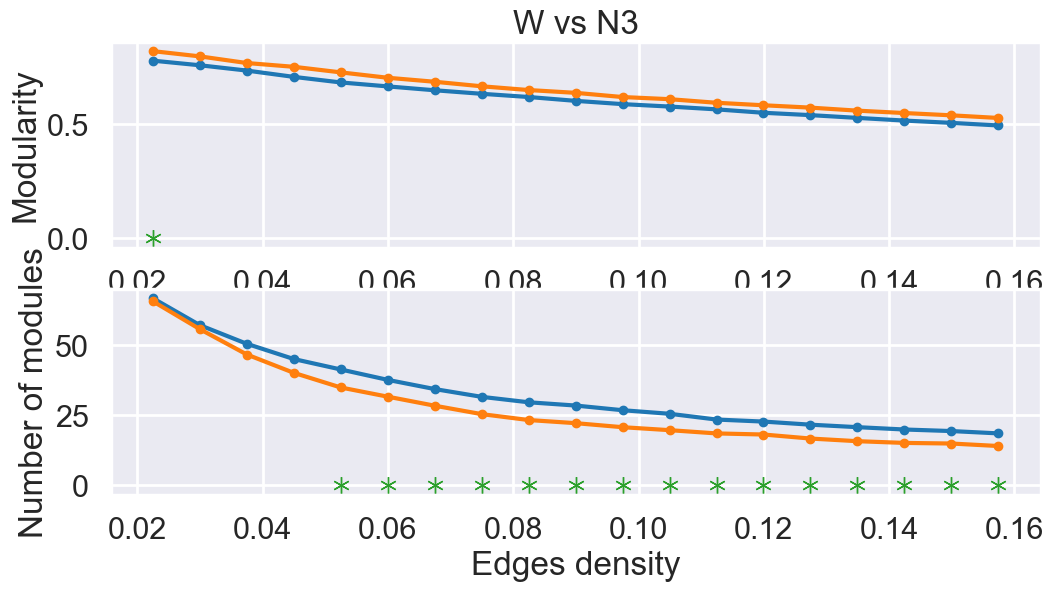

In [31]:
plt.subplot(211)   
plt.plot(ds/aristas_posibles,list(df_modularity_W['mean']),'.-')
plt.plot(ds/aristas_posibles,list(df_modularity_N3['mean']),'.-')
plt.plot(df_ttest_modularity_W_N3[1],df_ttest_modularity_W_N3[0]*0, linestyle='',marker=(6, 2, 0))
plt.title('W vs N3')
plt.ylabel('Modularity')

plt.subplot(212)
plt.plot(ds/aristas_posibles,list(df_number_of_modules_W['mean']),'.-')
plt.plot(ds/aristas_posibles,list(df_number_of_modules_N3['mean']),'.-')
plt.plot(df_ttest_number_of_modules_W_N3[1],df_ttest_number_of_modules_W_N3[0]*0, linestyle='',marker=(6, 2, 0))
plt.xlabel('Edges density')
plt.ylabel('Number of modules')
